# Idea #1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(15,7)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [2]:
# np.random.seed(200) #-- works for lin reg
# np.random.seed(110)

# Data

In [3]:
data=pd.read_csv('DATA.csv')
data

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,mol_filename_anion,FG_no,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,...,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,PHENAZINE_anion,0,4.515185,0.950185,4.515185,...,0.565426,0.984436,0.004060,0.175744,0.824256,203.025746,952.211108,1155.236854,2.590521,3.469194e-10
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,2CH3N_R1_Anion,1,4.694722,0.939167,4.694722,...,0.414850,0.964725,0.001641,0.263258,0.754145,459.636664,1316.701291,1745.953265,2.894724,2.616881e-02
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,2CH3N_R2_Anion,1,4.631574,0.939167,4.631574,...,0.652689,0.991067,0.003116,0.133363,0.880800,282.693153,1867.057219,2119.729166,3.186999,2.147342e-02
3,3,NH2,1,-1.85,NH2_R1_neutral,NH2_R1_anion,14,5.844735,0.671994,5.844735,...,0.480865,0.974914,0.002627,0.222582,0.777534,296.015256,1034.054046,1329.914576,2.672942,1.638895e-04
4,4,NH2,2,-1.92,NH2_R2_neutral,NH2_R2_anion,14,5.700164,0.714890,5.700164,...,0.620758,0.988920,0.003874,0.148451,0.851582,219.819135,1260.983509,1480.753866,2.820395,4.615913e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,NO2_R1267_anion,15,11.230655,-1.013112,11.230655,...,0.573428,0.985310,0.000926,0.170773,0.857589,925.652115,4648.439587,5420.359453,3.928670,3.827094e-02
181,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,NO2_R1469_anion,15,11.151935,-0.893097,11.151935,...,0.215618,0.852354,0.000234,0.522965,0.525738,2250.280048,2262.214379,4302.929844,3.517875,6.432619e-02
182,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,NO2_R2378_anion,15,10.985181,-0.970500,10.985181,...,0.654730,0.991202,0.001018,0.132357,0.891029,874.926498,5890.018831,6610.353674,4.333218,3.206787e-02
183,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,NO2_R123469_anion,15,11.524990,-1.915802,11.524990,...,0.258234,0.916344,0.000251,0.400392,0.652081,2601.278722,4236.464502,6496.833550,3.857006,7.038922e-02


In [4]:
data.describe()

,Redox Potential,FG_no,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,-1.418162,11.935135,8.357724,0.017421,8.357724,0.334495,0.459133,251.739665,243.822778,251.563366,...,0.500161,0.971588,0.001784,0.221606,0.784182,610.600835,2082.169005,2671.017908,3.239580,7.662502e-03
std,0.680095,4.536819,2.312979,0.749930,2.312979,0.276733,0.105647,47.312133,49.239681,47.301247,...,0.121475,0.022609,0.000944,0.080213,0.075104,421.605569,902.824560,1170.596904,0.345794,1.758956e-02
min,-2.390000,0.000000,4.515185,-4.419993,4.515185,0.000190,0.164131,180.210000,172.146000,180.068748,...,0.215618,0.852354,0.000234,0.083447,0.514366,203.025746,952.211108,1155.236854,2.590521,0.000000e+00
25%,-1.950000,7.000000,5.893783,-0.305331,5.893783,0.111088,0.377663,225.207000,214.167000,225.053826,...,0.414234,0.963966,0.001017,0.161627,0.741396,342.256821,1507.190675,1911.638128,2.996801,0.000000e+00
50%,-1.690000,14.000000,9.197306,0.209964,9.197306,0.268600,0.447395,240.270000,228.174000,240.112344,...,0.500315,0.977462,0.001650,0.211111,0.789642,470.306717,1833.624000,2266.577105,3.159866,7.747000e-09
75%,-0.820000,15.000000,9.685346,0.485710,9.685346,0.496068,0.563308,270.204000,264.156000,270.038905,...,0.593490,0.986852,0.002394,0.266024,0.840122,714.304016,2427.479278,3167.604263,3.430181,5.252499e-04
max,0.800000,20.000000,13.411611,0.954259,13.411611,1.660140,0.644787,540.186000,540.186000,539.949374,...,0.770550,0.996512,0.004060,0.522965,0.916553,2952.179383,7167.909370,9650.125026,4.333218,8.608742e-02


# Preprocessing

In [5]:
# X=data.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','mol_filename_anion'])
# y=data['Redox Potential']
# print(X.shape,y.shape)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     shuffle=True,
#                                                     test_size=0.30)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

In [6]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','mol_filename_anion'])
y=data['Redox Potential']
data_train, data_test = train_test_split(data,
                                         shuffle=True,
                                         test_size=0.30)

X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','mol_filename_anion'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','mol_filename_anion'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 145) (129,)
(56, 145) (56,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# EDA (Visualization)

## Feature Correlations

Text(0.5, 1.0, 'Feature Correlation Plot')

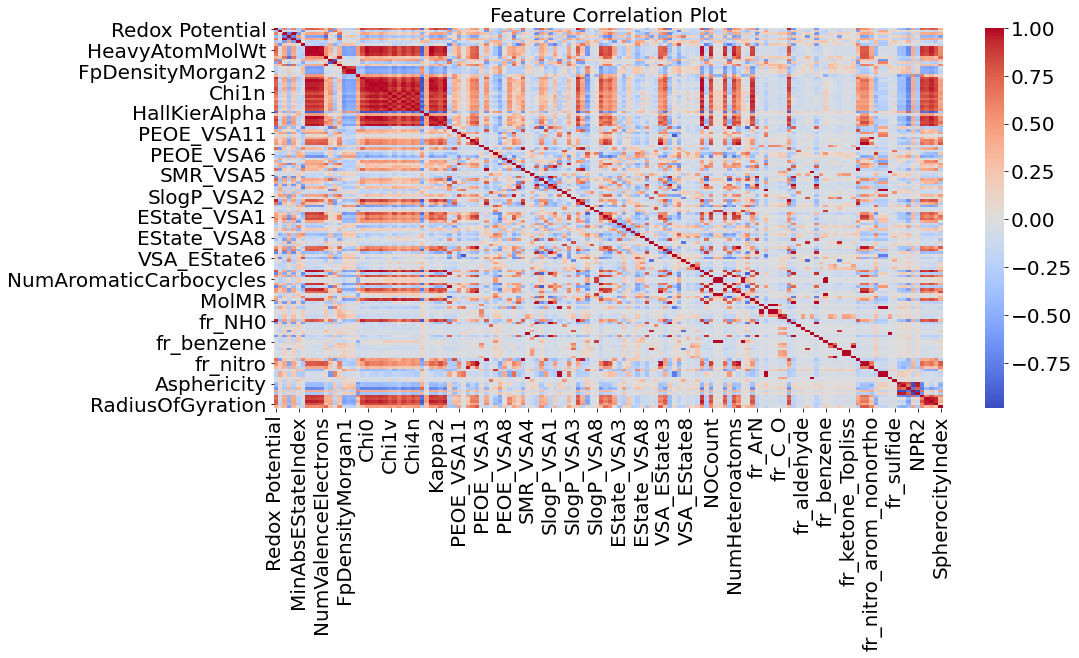

In [8]:
# plt.matshow(corr)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
import seaborn as sns
pd.options.display.max_rows = 4000


corr = data.corr()
sns.heatmap(corr,cmap='coolwarm')
plt.title('Feature Correlation Plot')

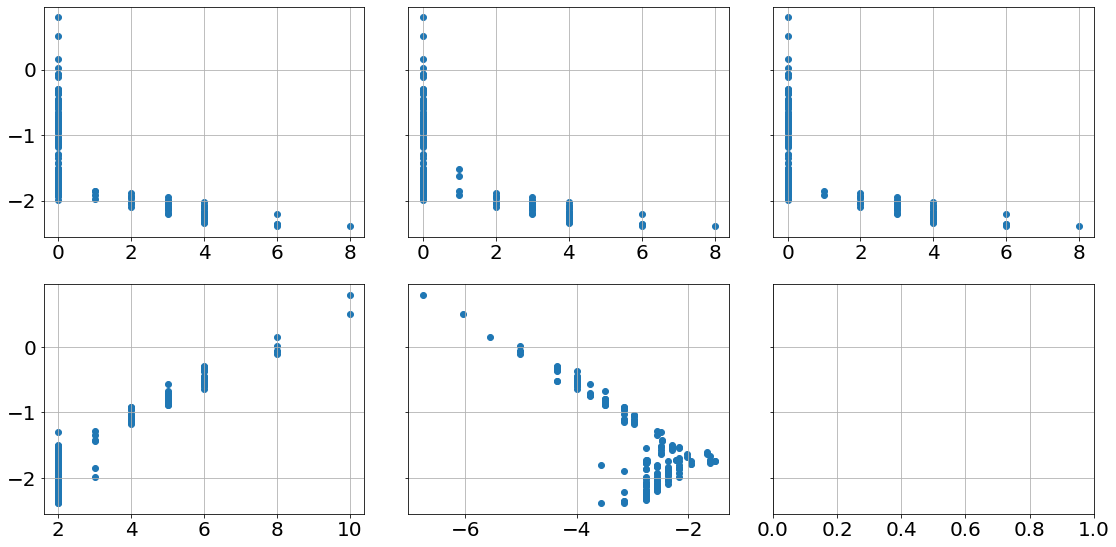

In [60]:
fig,axes=plt.subplots(2,3,figsize=(16,8),sharey=True)
axes[0][0].scatter(data['fr_aniline'],y)
axes[0][1].scatter(data['fr_NH2'],y)
axes[0][2].scatter(data['fr_ArN'],y)
axes[1][0].scatter(data['fr_NH0'],y)
axes[1][1].scatter(data['HallKierAlpha'],y)
plt.tight_layout()

## Distribution of Data

Text(0.5, 1.0, 'Distribution of Redox Potential (target variable)')

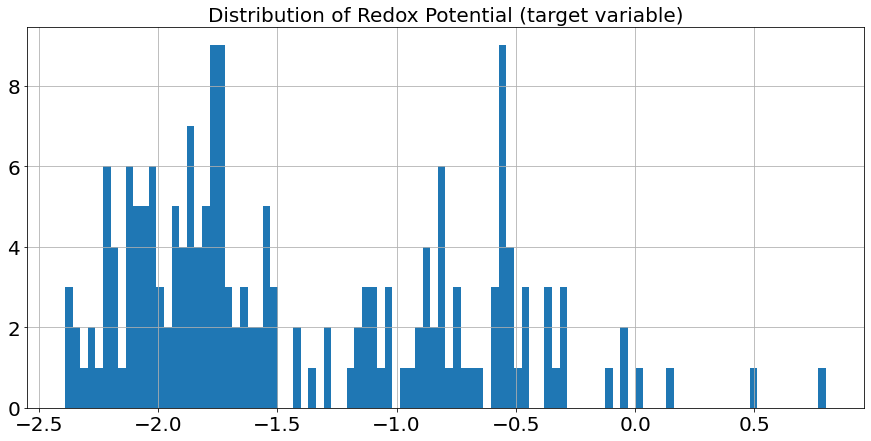

In [10]:
plt.hist(data['Redox Potential'],bins=100)
plt.title('Distribution of Redox Potential (target variable)')

<BarContainer object of 21 artists>

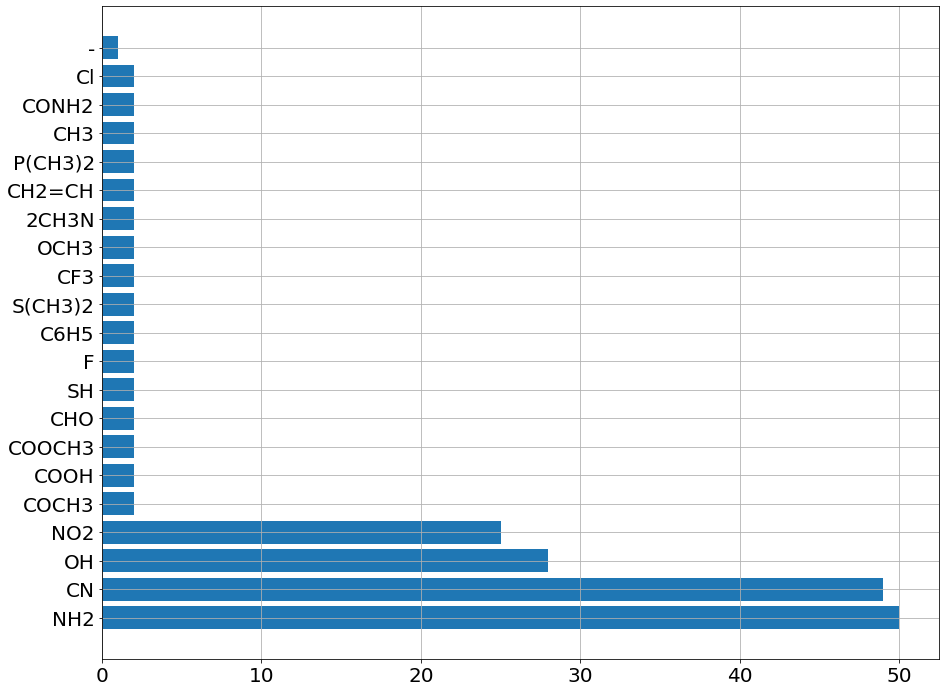

In [11]:
#seed=200
fg_dist=data['FG_name'].value_counts()
plt.figure(figsize=(15,12))
plt.barh(fg_dist.index,fg_dist)
# plt.xticks(rotation=90);

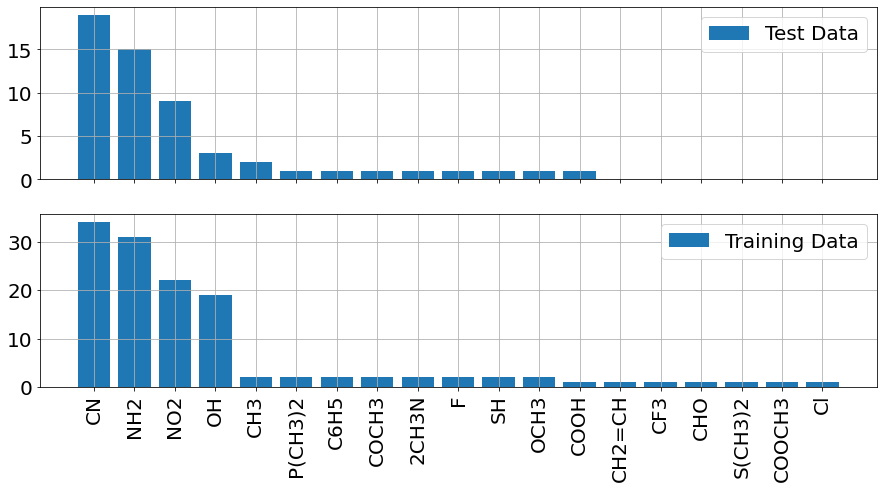

In [12]:
#seed=200
train_dist=data.iloc[X_train.index]['FG_name'].value_counts()
test_dist=data.iloc[X_test.index]['FG_name'].value_counts()
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)

ax1.bar(test_dist.index,test_dist,label='Test Data')
ax2.bar(train_dist.index,train_dist,label='Training Data')

plt.xticks(rotation=90)
ax1.legend()
ax2.legend()

# Baseline Models

### 1. Linear Regression

R^2 = 0.781942935584973


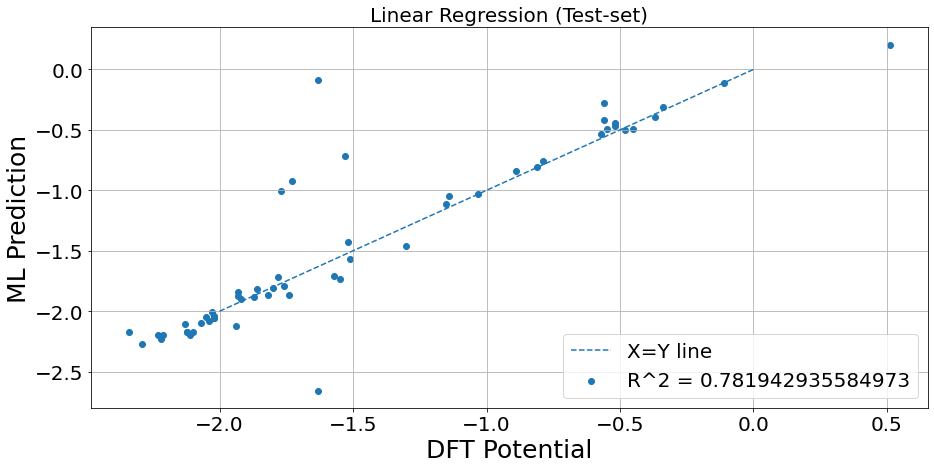

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled, y_train)

y_pred=reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Linear Regression (Test-set)')
plt.legend()

### 2. SVR

R^2 = 0.9051639048313551


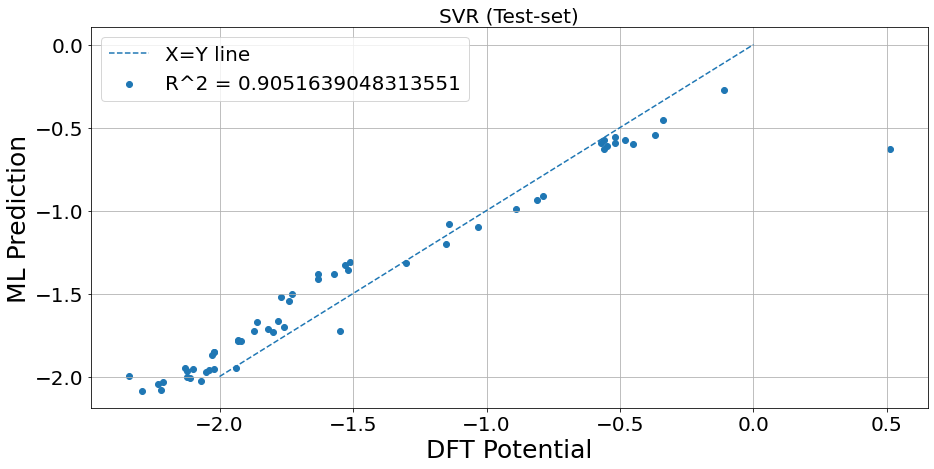

In [14]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled, y_train)

y_pred=svr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('SVR (Test-set)')
plt.legend()

### 3. Gradient Boosting Regression

R^2 = 0.9816967943956165


Text(0.5, 1.0, 'Gradient Boosting Regression (Test-set)')

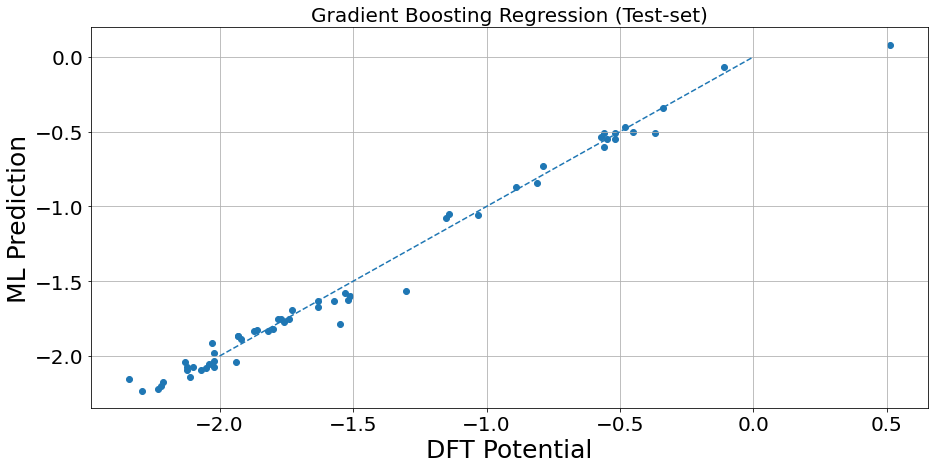

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled, y_train)

y_pred=gbr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='Y = X line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Gradient Boosting Regression (Test-set)')

# Comparative Study - Multiple Models

## Performance on Test-Set

knn_reg: 100%|██████████| 20/20 [05:48<00:00, 17.44s/it]                   

Total Models = 20
CPU times: user 10min 28s, sys: 1min 20s, total: 11min 49s
Wall time: 5min 49s


Text(0.5, 1.0, 'Unoptimized Model Performance on Test-Set (all features)')

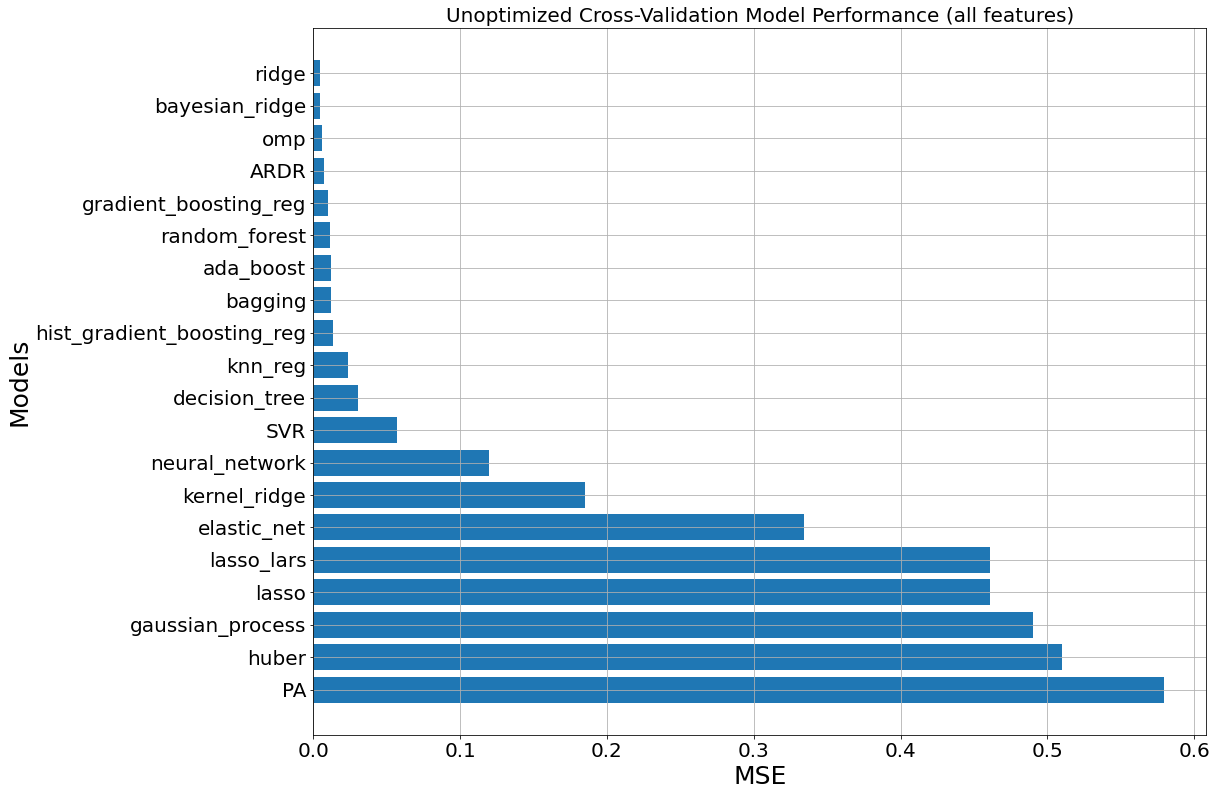

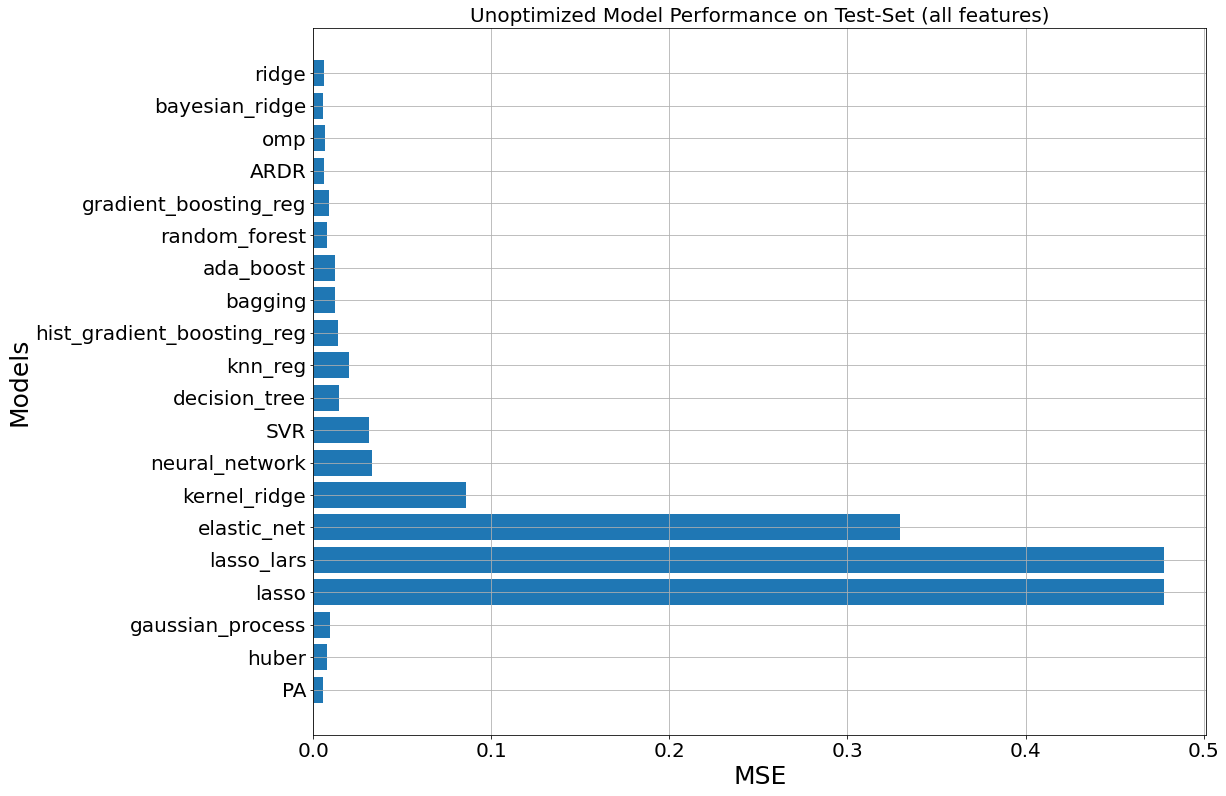

In [61]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models_dict_unopt={#('linear_reg',LinearRegression(),
             'ridge':Ridge(),
             'lasso':Lasso(),
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':ElasticNet(),
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':LassoLars(),
             'omp':OrthogonalMatchingPursuit(),
             'bayesian_ridge':BayesianRidge(),
             'ARDR':ARDRegression(),
             'PA':PassiveAggressiveRegressor(),
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':HuberRegressor(epsilon=1,
                                     alpha=1e-3,
                                     tol=1e-6,
                                     max_iter=50000),
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':KernelRidge(kernel='rbf'),
             'SVR':SVR(),
             'gaussian_process':GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
             'decision_tree':DecisionTreeRegressor(),
             'bagging':BaggingRegressor(n_jobs=-1),
             'random_forest':RandomForestRegressor(),
             'ada_boost':AdaBoostRegressor(),
             'gradient_boosting_reg':GradientBoostingRegressor(),
             'hist_gradient_boosting_reg':HistGradientBoostingRegressor(),
             'neural_network':MLPRegressor(hidden_layer_sizes=(50,20),
                                            max_iter=10000),
             'knn_reg':KNeighborsRegressor()
            }

num_folds=10
cv_results_all_feat_unopt={'model_name':[],'mse_cv':[],'mse_testset':[]}
pbar=tqdm(models_dict_unopt.items())
for model_name,model in pbar:
    pbar.set_description(model_name)
    scores=cross_val_score(model,
                           X_train_scaled,
                           y_train,
                           cv=num_folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1
                          )
    mean_score=-scores.mean()
    reg_model = model.fit(X_train_scaled, y_train)
    y_pred=reg_model.predict(X_test_scaled)
    mse_testset=mean_squared_error(y_test, y_pred)
    cv_results_all_feat_unopt['model_name'].append(model_name)
    cv_results_all_feat_unopt['mse_cv'].append(mean_score)
    cv_results_all_feat_unopt['mse_testset'].append(mse_testset)

print(f'Total Models = {len(models_dict_unopt)}')
df=pd.DataFrame.from_dict(cv_results_all_feat_unopt)
df=df.sort_values('mse_cv',ascending=False)
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_cv'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Unoptimized Cross-Validation Model Performance (all features)')
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Unoptimized Model Performance on Test-Set (all features)')

# Hyper-parameter Tuning (Model Optimization)

In [64]:
%%time
from IPython.display import clear_output
from sklearn.model_selection import GridSearchCV

param_grid_dict={#('linear_reg',LinearRegression(),
             'ridge':{'alpha':[0.5,1,1.5],
                      'tol':[1e-3,1e-4,1e-5],
                      'max_iter':[500,1000,5000],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                     },
             'lasso':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                      'positive':[True,False],
                      'tol':[1e-4,1e-5,1e-6,1e-7],
                      'max_iter':[100,200,500,1000],
                     },
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':{'alpha':[0.5,1,1.5],
                            'l1_ratio':[0.2,0.5,0.8],
                            'positive':[True,False],
                            'tol':[1e-3,1e-4,1e-5],
                            'max_iter':[500,1000,5000]
                           },
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                            'jitter':[None,0.1,1,10,100],
                            'positive':[True,False],
                            'max_iter':[100,200,500,1000],
                           },
             'omp':{#'n_nonzero_coefs':[None,5,10,20],
#                     'tol':[0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7]
                   },
             'bayesian_ridge':{'n_iter':[200,300,500],
                               'tol':[1e-2,1e-3,1e-4],
                               'alpha_1':[1e-5,1e-6,1e-7],
                               'alpha_2':[1e-5,1e-6,1e-7],
                               'lambda_1':[1e-5,1e-6,1e-7],
                               'lambda_2':[1e-5,1e-6,1e-7],
                              },
             'ARDR':{'n_iter':[200,300,500],
                     'tol':[1e-2,1e-3,1e-4],
                     'alpha_1':[1e-5,1e-6,1e-7],
#                      'alpha_2':[1e-5,1e-6,1e-7],
                     'lambda_1':[1e-5,1e-6,1e-7],
#                      'lambda_2':[1e-5,1e-6,1e-7],
#                      'threshold_lambda':[5000,10000,20000]
                    },
             'PA':{'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.15],
                   'max_iter':[100,200,500,1000,1500,2000],
                   'tol':[1e-5,1e-6,1e-7,1e-8],
#                    'early_stopping':[True,False],
#                    'average':[True,False],
#                    'validation_fraction':[0.05,0.1,0.2]
                  },
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':{'epsilon':[1,1.35,1.5],
                      'alpha':[1e-3,1e-4,1e-5],
                      'tol':[1e-5,1e-6,1e-7],
                      'max_iter':[1000,50000]
                     },
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':{'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
                             'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
                             'alpha':[0.01,0.1,1,5,10,100]
                            },
             'SVR':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                    'C':[0.5,1,1.5],
                    'tol':[1e-2,1e-3,1e-4],
                    'gamma':['scale','auto']
                   },
             'gaussian_process':{'kernel':[DotProduct()+WhiteKernel(),
                                           RBF()+WhiteKernel(),
                                           34.4**2 * RBF(length_scale=41.8)
                                            + 3.27**2 * RBF() * ExpSineSquared()
                                            + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
                                            + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336),
                                           ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
                                          ],
                                 'alpha':[1e-9,1e-10,1e-11]
                                },
             'decision_tree':{#'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
#                               'splitter':['best','random'],
#                               'max_features':['auto', 'sqrt', 'log2'],
#                               'ccp_alpha':[-1,0,0.1,0.5,1],
                              'max_depth':[None,10,20,50,100,200]
                             },
             'bagging':{'n_estimators': np.arange(50,1000,50),
                        'bootstrap':[True,False],
                        'bootstrap_features':[True,False],
                        'oob_score':[True,False]
                       },
             'random_forest':{'n_estimators': np.arange(50,501,50),
                              'bootstrap':[True,False],
                              'oob_score':[True,False],
#                               'criterion':['mse', 'mae'],
#                               'max_features':['auto', 'sqrt', 'log2'],
#                               'ccp_alpha':[0,0.5,1]
                              },
             'ada_boost':{'n_estimators': np.arange(50,501,50),
                          'learning_rate':[0.5,1,1.5],
                          'loss':['linear', 'square', 'exponential']
                         },
             'gradient_boosting_reg':{#'loss':['ls', 'lad', 'huber', 'quantile'],
#                                       'learning_rate':[0.5,1,1.5],
                                      'n_estimators': np.arange(50,501,50),
#                                       'criterion':['friedman_mse', 'mse', 'mae'],
                                      'max_depth':[2,3,10,20,50],
#                                       'max_features':['auto', 'sqrt', 'log2'],
#                                       'alpha':[0.6,0.9,1.2],
                                      'tol':[1e-2,1e-3,1e-4],
#                                       'ccp_alpha':[0.5,1,1.5]
                                     },
             'hist_gradient_boosting_reg':{},
             'neural_network':{'hidden_layer_sizes':[(10,10,10),(50,30,20),(80,60,30)],
                               'activation':['identity', 'logistic', 'tanh', 'relu'],
                               'solver':['lbfgs', 'sgd', 'adam'],
                               'learning_rate':['constant', 'invscaling', 'adaptive'],
                               'early_stopping':[True,False]
                              },
             'knn_reg':{'n_neighbors':np.arange(1,10,2),
                        'weights':['uniform', 'distance'],
                        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size':[40,50,75]
                       }
            }

gs_results_dict={'model_name':[],
              'r2_unopt':[],'r2_opt':[],
              'mse_unopt':[],'mse_opt':[],
              'best_model_type':[],
              'opt_params':[],
              'best_model':[]
             }
scoring = ['neg_mean_squared_error','r2']
# test_model='PA'
# for model_name,param_grid in [(test_model,param_grid_dict[test_model])]:
for model_name,param_grid in param_grid_dict.items():
    print(model_name)
    unopt_estimator=models_dict_unopt[model_name]
    gs = GridSearchCV(unopt_estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=False,
                  cv=10,
                  verbose=2,
                  n_jobs=-1
                 )
    gs.fit(X_train_scaled, y_train)
    #unopt
    unopt_estimator=unopt_estimator.fit(X_train_scaled, y_train)
    y_pred_unopt=unopt_estimator.predict(X_test_scaled)
    mse_unopt=mean_squared_error(y_test,y_pred_unopt)
    r2_unopt=r2_score(y_test,y_pred_unopt)
    #opt
    opt_estimator=gs.best_estimator_
    y_pred_opt=opt_estimator.predict(X_test_scaled)
    mse_opt=mean_squared_error(y_test,y_pred_opt)
    r2_opt=r2_score(y_test,y_pred_opt)
    #data
    gs_results_dict['model_name'].append(model_name)
    gs_results_dict['mse_unopt'].append(mse_unopt)
    gs_results_dict['r2_unopt'].append(r2_unopt)
    gs_results_dict['mse_opt'].append(mse_opt)
    gs_results_dict['r2_opt'].append(r2_opt)
    best_model_type='opt' if r2_opt>r2_unopt else 'unopt'
    best_model=opt_estimator if r2_opt>r2_unopt else unopt_estimator
    gs_results_dict['best_model_type'].append(best_model_type)
    gs_results_dict['opt_params'].append(gs.best_params_)
    gs_results_dict['best_model'].append(best_model)
    print(r2_unopt,r2_opt)
    
clear_output()
model_opt_data_df=pd.DataFrame.from_dict(gs_results_dict)
print(f'Total Models = {model_opt_data_df.shape[0]}')
model_opt_data_df

Total Models = 20
CPU times: user 23min 21s, sys: 4min 24s, total: 27min 46s
Wall time: 13min 51s


,model_name,r2_unopt,r2_opt,mse_unopt,mse_opt,best_model_type,opt_params,best_model
0,ridge,0.987299,0.987584,0.005984,0.005850,opt,"{'alpha': 1.5, 'max_iter': 500, 'solver': 'spa...","Ridge(alpha=1.5, max_iter=500, solver='sparse_..."
1,lasso,-0.013575,0.983265,0.477556,0.007885,opt,"{'alpha': 0.01, 'max_iter': 100, 'positive': F...","Lasso(alpha=0.01, max_iter=100)"
2,elastic_net,0.300333,0.927696,0.329655,0.034067,opt,"{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5..."
3,lasso_lars,-0.013575,0.937375,0.477556,0.029506,opt,"{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","LassoLars(alpha=0.01, max_iter=100)"
4,omp,0.985918,0.985918,0.006635,0.006635,unopt,{},OrthogonalMatchingPursuit()
5,bayesian_ridge,0.987926,0.987925,0.005689,0.005689,unopt,"{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...",BayesianRidge()
6,ARDR,0.987299,0.987299,0.005984,0.005984,unopt,"{'alpha_1': 1e-05, 'lambda_1': 1e-06, 'n_iter'...",ARDRegression()
7,PA,0.983256,0.983736,0.007889,0.007663,opt,"{'C': 0.6, 'max_iter': 500, 'tol': 1e-08}","PassiveAggressiveRegressor(C=0.6, max_iter=500..."
8,huber,0.983557,0.983554,0.007747,0.007749,unopt,"{'alpha': 0.001, 'epsilon': 1, 'max_iter': 100...","HuberRegressor(alpha=0.001, epsilon=1, max_ite..."
9,kernel_ridge,0.818033,0.988134,0.085735,0.005591,opt,"{'alpha': 0.01, 'gamma': 0.001, 'kernel': 'pol...","KernelRidge(alpha=0.01, gamma=0.001, kernel='p..."


In [18]:
import pickle

with open('MODEL_OPT_DATA_DF.pkl','wb') as outfile:
    pickle.dump(model_opt_data_df,outfile)

lasso: : 1it [00:01,  1.70s/it]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1767150235923991, tolerance: 0.005847068372093023
  positive)
knn_reg: : 20it [05:48, 17.41s/it]                   


CPU times: user 11min 5s, sys: 3min 34s, total: 14min 40s
Wall time: 5min 48s


Text(0.5, 1.0, 'Optimized Model Performance on Test-Set (all features)')

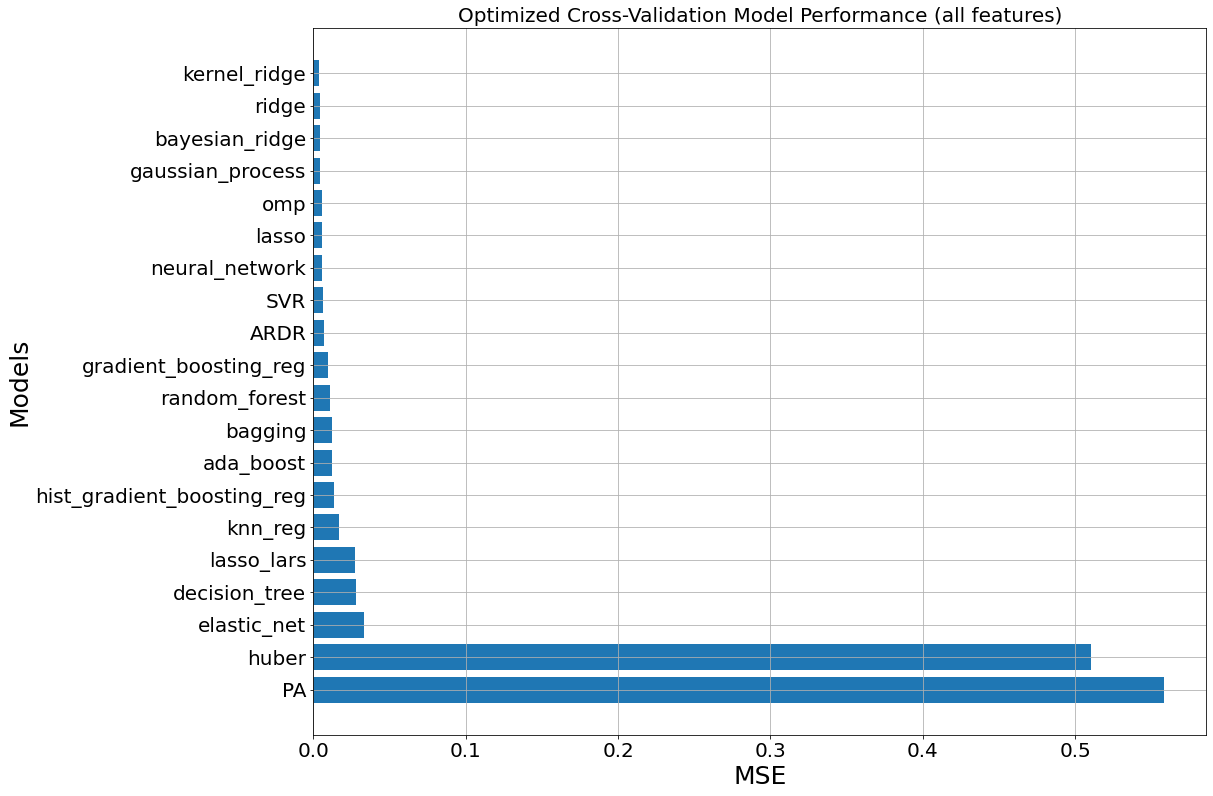

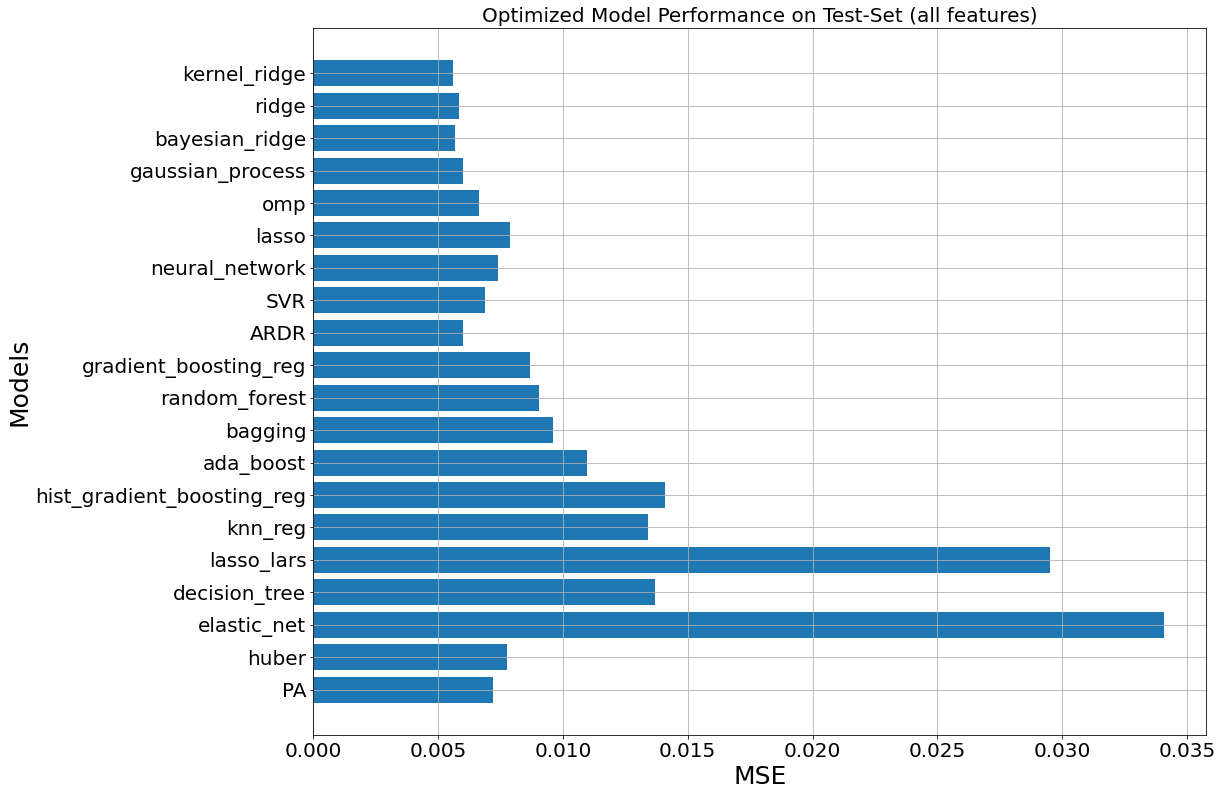

In [23]:
%%time
num_folds=10
cv_results_all_feat_opt={'model_name':[],'mse_cv':[],'mse_testset':[]}
pbar=tqdm(model_opt_data_df.iterrows())
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    model=row['best_model']
    scores=cross_val_score(model,
                           X_train_scaled,
                           y_train,
                           cv=num_folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=30
                          )
    mean_score=-scores.mean()
    reg_model = model.fit(X_train_scaled, y_train)
    y_pred=reg_model.predict(X_test_scaled)
    mse_testset=mean_squared_error(y_test, y_pred)
    cv_results_all_feat_opt['model_name'].append(model_name)
    cv_results_all_feat_opt['mse_cv'].append(mean_score)
    cv_results_all_feat_opt['mse_testset'].append(mse_testset)

df=pd.DataFrame.from_dict(cv_results_all_feat_opt)
df=df.sort_values('mse_cv',ascending=False)
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_cv'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Optimized Cross-Validation Model Performance (all features)')
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Optimized Model Performance on Test-Set (all features)')

### Kernel Ridge Regression

{'alpha': 0.01, 'gamma': 0.001, 'kernel': 'polynomial'}
R^2 = 0.8180330181840727
R^2 = 0.9881336541999878


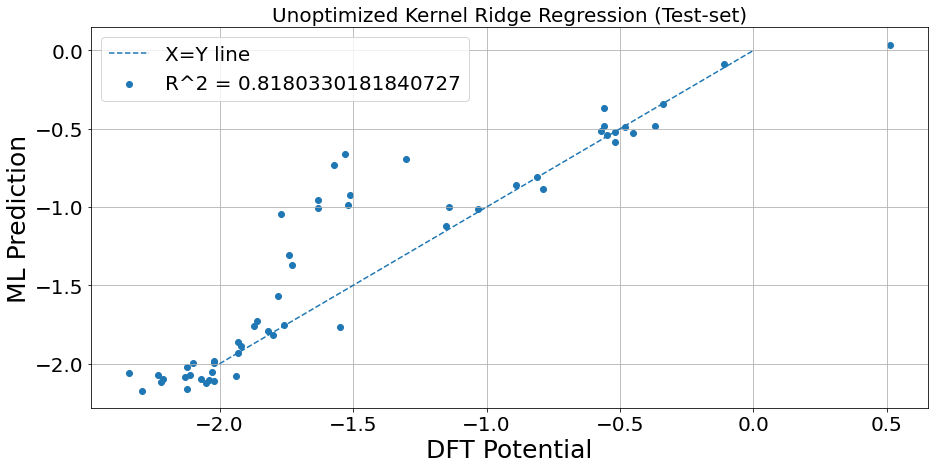

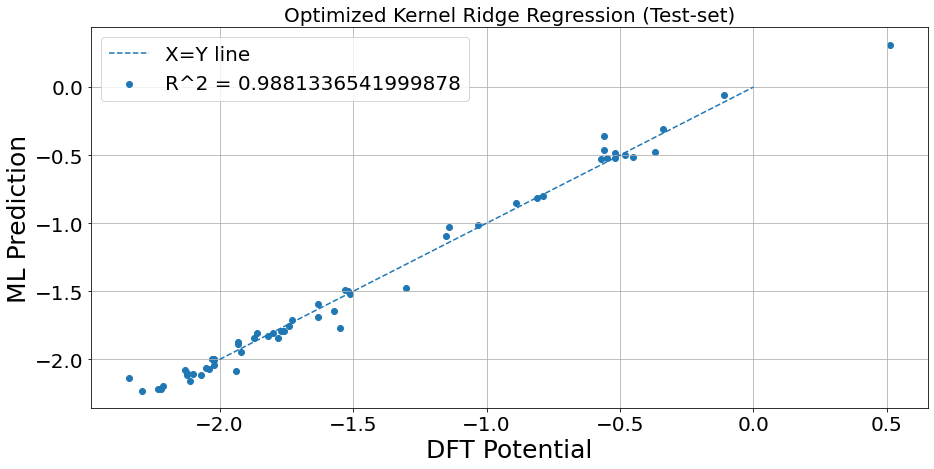

In [62]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':[0.01,0.1,1,5,10,100]}

scoring = ['neg_mean_squared_error','r2']

estimator = KernelRidge()

krr_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1
                 )
krr_gs.fit(X_train_scaled, y_train)
display.clear_output()
print(krr_gs.best_params_)

plt.figure()
krr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled, y_train)
y_pred=krr_reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Unoptimized Kernel Ridge Regression (Test-set)')
plt.legend()

plt.figure()
y_pred=krr_gs.best_estimator_.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Optimized Kernel Ridge Regression (Test-set)')
plt.legend()

# Feature Importance

In [25]:
feat_idx2name={idx:col for idx,col in enumerate(X_train.columns)}
feat_name2idx={col:idx for idx,col in enumerate(X_train.columns)}
feat_name_list=X_train.columns

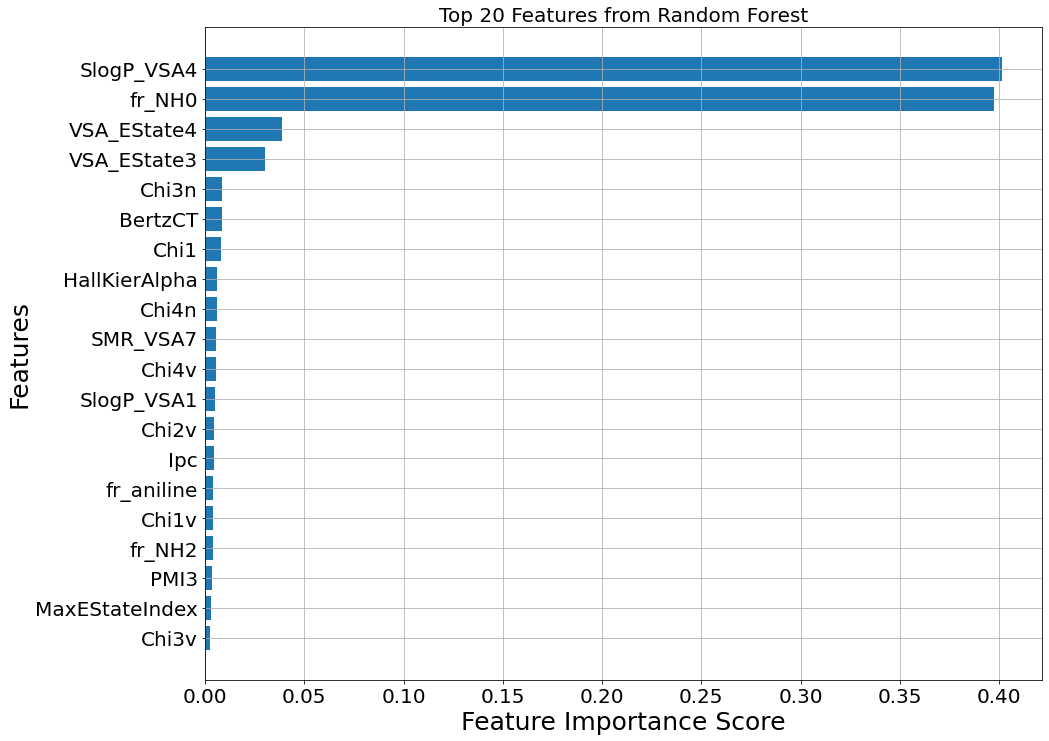

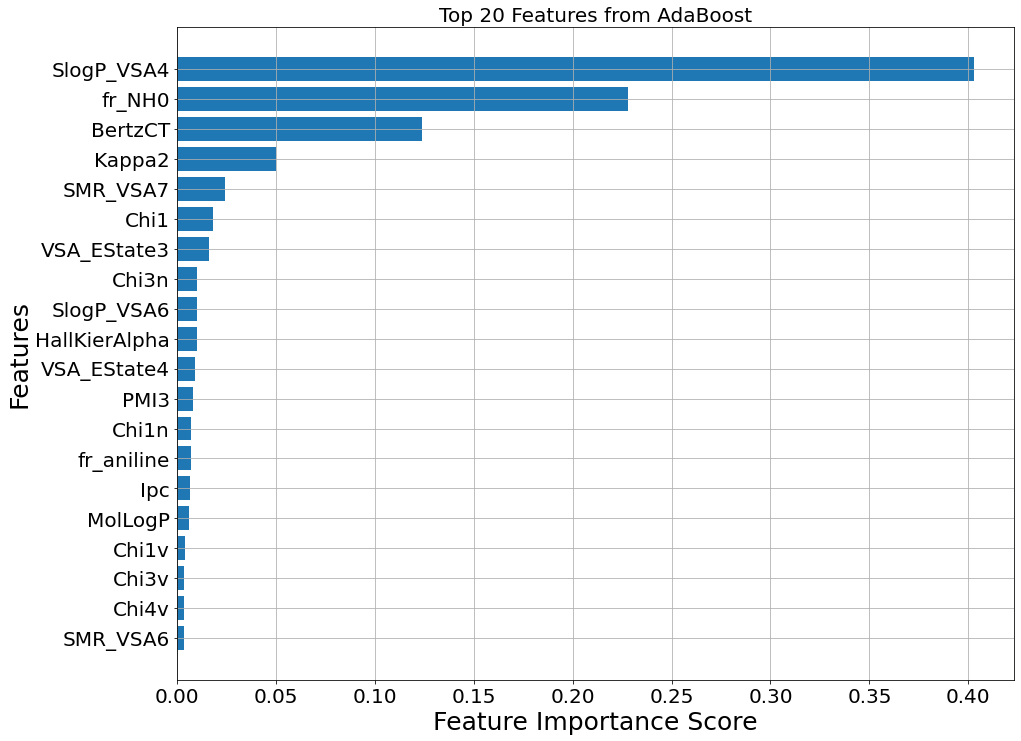

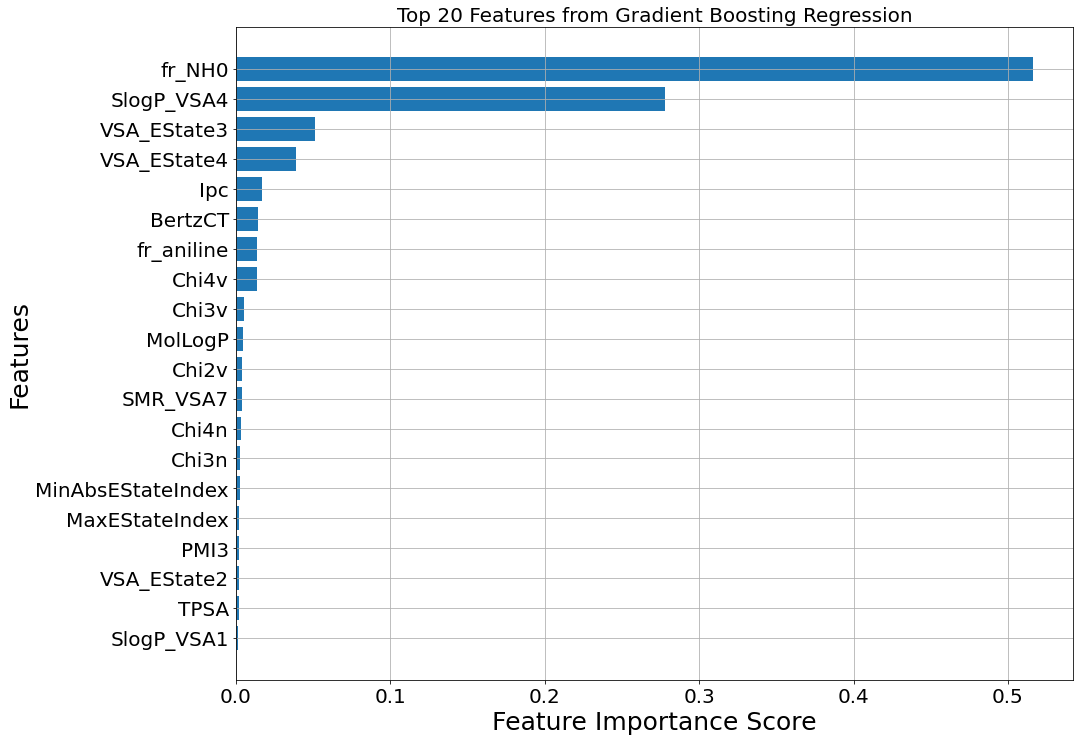

In [27]:
feat_imp_dict={}

ntop=20
rf_reg=model_opt_data_df[model_opt_data_df['model_name']=='random_forest']['best_model'].values[0]
rf_feat_score = rf_reg.feature_importances_
rf_feat_score_sorted_idx=rf_feat_score.argsort()
feat_imp_dict['random_forest_opt']=rf_feat_score_sorted_idx
plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:feat_idx2name[x],rf_feat_score_sorted_idx))
plt.barh(rf_top_features[-ntop:],rf_feat_score[rf_feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Random Forest')
plt.show()


adaboost_reg=model_opt_data_df[model_opt_data_df['model_name']=='ada_boost']['best_model'].values[0]      
feat_score = adaboost_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['ada_boost_opt']=feat_score_sorted_idx
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from AdaBoost')
plt.show()

gbt_reg=model_opt_data_df[model_opt_data_df['model_name']=='gradient_boosting_reg']['best_model'].values[0]      
feat_score = gbt_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['gradient_boosting_reg_opt']=feat_score_sorted_idx
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Gradient Boosting Regression')
plt.show()

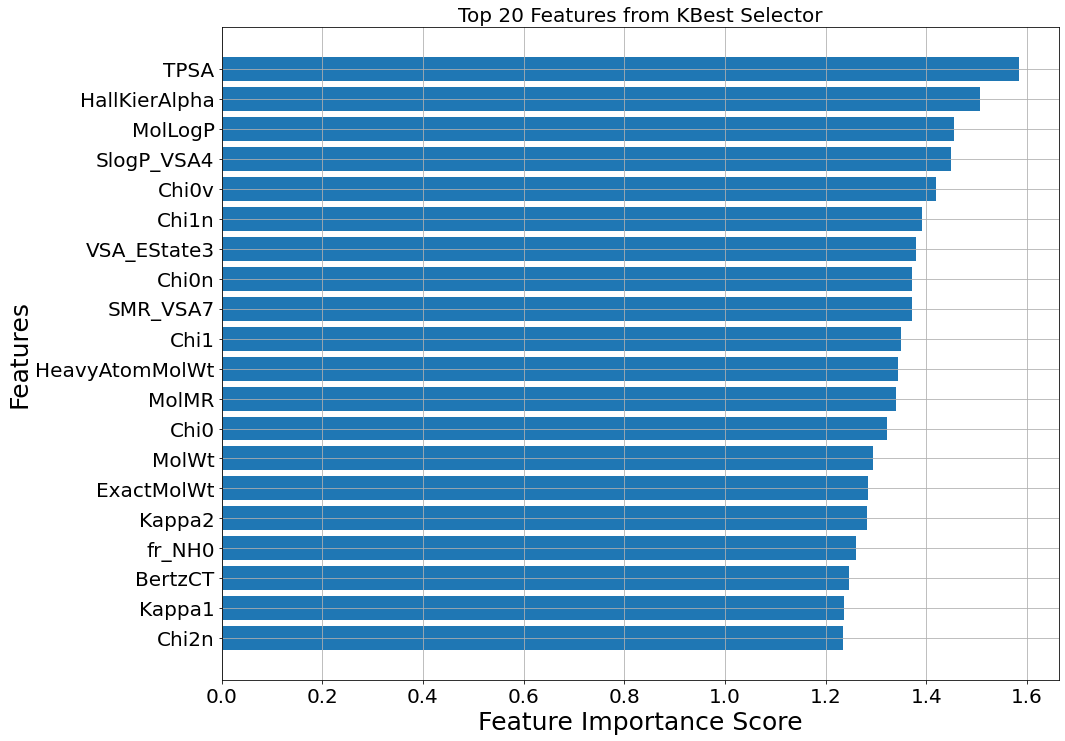

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

kbest_selector=SelectKBest(mutual_info_regression).fit(X_train_scaled, y_train)
feat_score=kbest_selector.scores_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['kbest_selector']=feat_score_sorted_idx

ntop=20
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from KBest Selector')
plt.show()

knn_reg: : 20it [14:04, 42.25s/it]                    


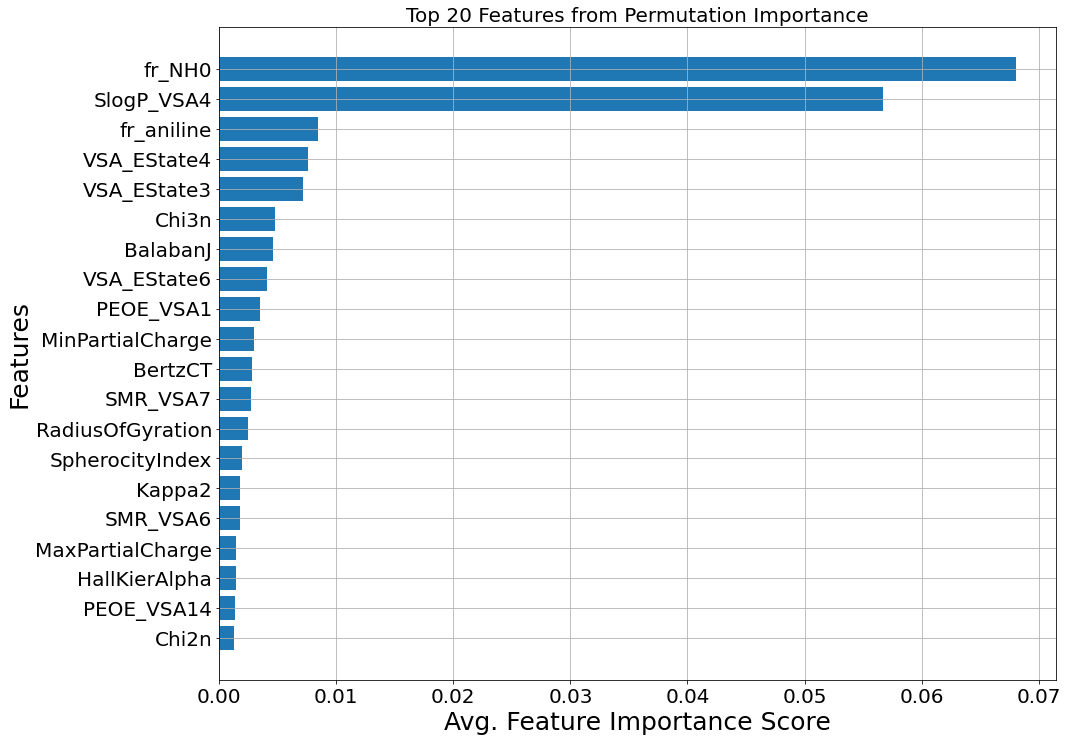

CPU times: user 51.7 s, sys: 21.2 s, total: 1min 12s
Wall time: 14min 5s


In [68]:
%%time
from sklearn.inspection import permutation_importance

pbar=tqdm(model_opt_data_df.iterrows())
avg_feat_score=[]
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    estimator=row['best_model']
    selector = permutation_importance(estimator,
                                      X_train_scaled, y_train,
                                      scoring='neg_mean_squared_error',
                                      n_jobs=10)
    feat_score=selector.importances_mean
    avg_feat_score.append(feat_score)
    feat_score_sorted_idx=feat_score.argsort()[::-1]
    feat_imp_dict[f'{model_name}_perm_imp']=feat_score_sorted_idx
avg_feat_score=np.array(avg_feat_score).mean(axis=0)
feat_score_sorted_idx=avg_feat_score.argsort()
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],avg_feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Avg. Feature Importance Score')
plt.title('Top 20 Features from Permutation Importance')
plt.show()

In [34]:
# %%time
# from sklearn.feature_selection import RFECV

# pbar=tqdm(model_opt_data_df.iterrows())
# for idx,row in pbar:
#     model_name=row['model_name']
#     pbar.set_description(model_name)
#     if model_name in ['huber','kernel_ridge','gaussian_process','bagging','neural_network','knn_reg']:
#         continue
#     estimator=row['best_model']
#     selector = RFECV(estimator,
#                      scoring='neg_mean_squared_error',
#                      cv=10,
#                      n_jobs=-1)
#     selector = selector.fit(X_train_scaled, y_train)
#     feat_score=selector.ranking_
#     feat_score_sorted_idx=feat_score.argsort()
#     feat_imp_dict[f'{model_name}_rfecv']=feat_score_sorted_idx



# feat_imp_df=pd.DataFrame.from_dict(feat_imp_dict)
# feat_imp_df
# from scipy import stats

# rfecv_cols=[col for col in feat_imp_df.columns if 'rfecv' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[rfecv_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_rfecv']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:20]

# perm_imp_cols=[col for col in feat_imp_df.columns if 'perm_imp' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[perm_imp_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_perm_imp']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:22]

# Model Performance on Top 20 Features (CV)

(129, 145) (56, 145)
R^2 = 0.9881336541999878


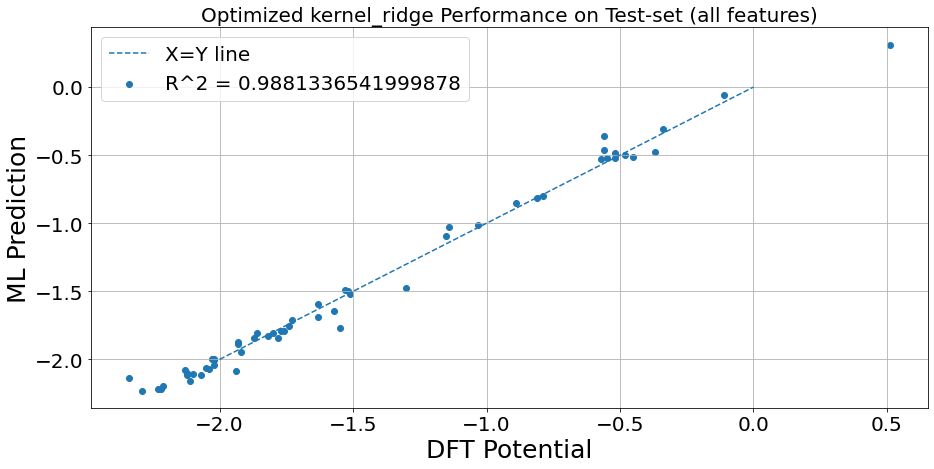

(129, 20) (56, 20)
R^2 = 0.9828147438938364


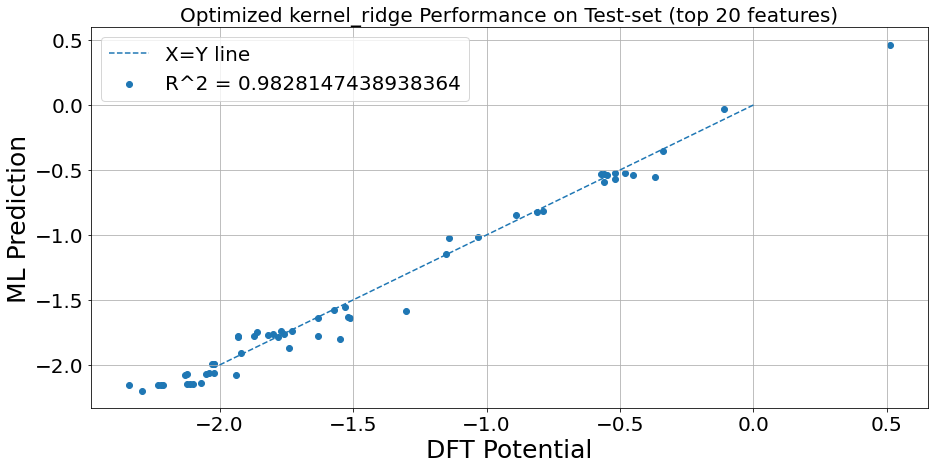

In [51]:
top_model=model_opt_data_df.iloc[model_opt_data_df['mse_opt'].argmin()]['best_model']
top_model_name=model_opt_data_df.iloc[model_opt_data_df['mse_opt'].argmin()]['model_name']
print(X_train_scaled.shape,X_test_scaled.shape)
ard_reg=top_model.fit(X_train_scaled, y_train)
y_pred=ard_reg.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'Optimized {top_model_name} Performance on Test-set (all features)')
plt.legend()
plt.show()


plt.figure()
from sklearn.linear_model import ARDRegression
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train,_X_test=X_train_scaled[:,rf_top_features_idx[-ntop:]],X_test_scaled[:,rf_top_features_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
ard_reg =top_model.fit(_X_train, y_train)
y_pred=ard_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'Optimized {top_model_name} Performance on Test-set (top 20 features)')
plt.legend()


lasso: : 0it [00:00, ?it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0369211790548466, tolerance: 0.005847068372093023
  positive)
omp: : 3it [00:00, 24.33it/s]        

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


knn_reg: : 20it [05:19, 15.96s/it]                   


Text(0.5, 1.0, 'Optimized Model Performance on Test-Set (top 21 features)')

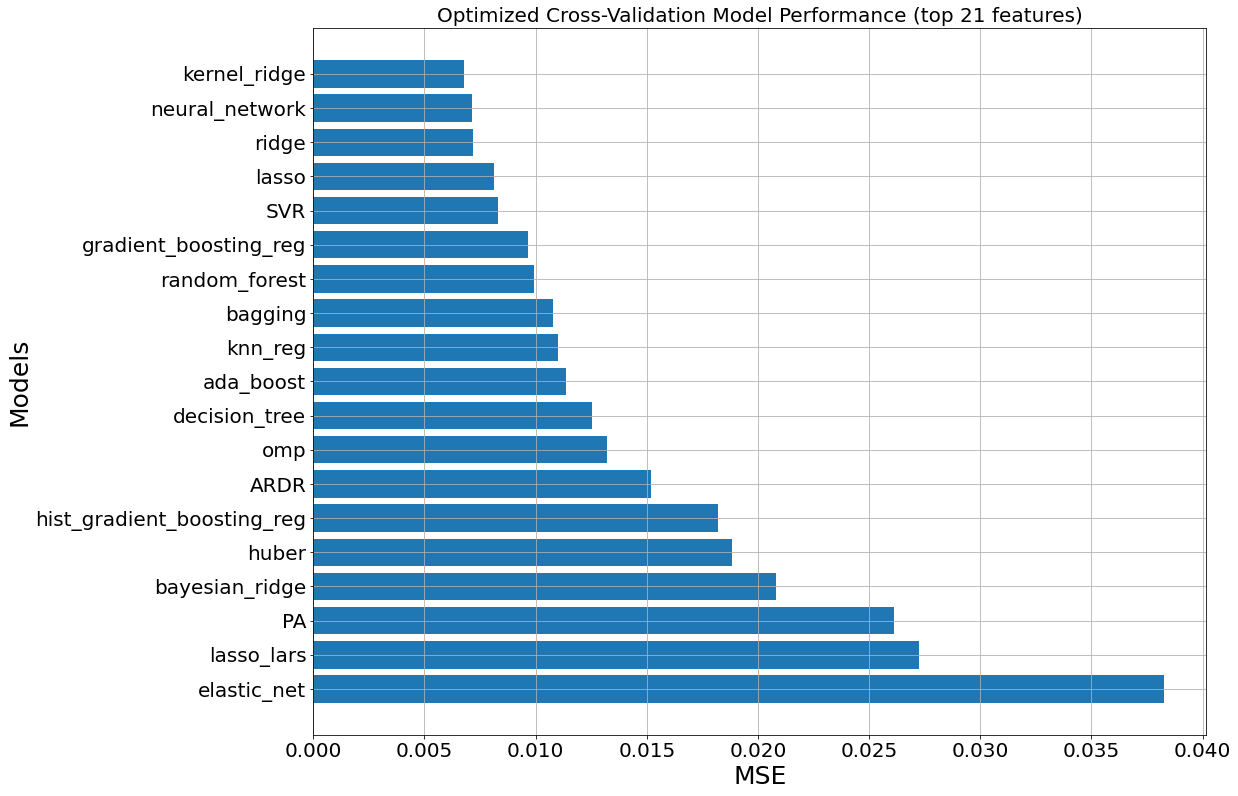

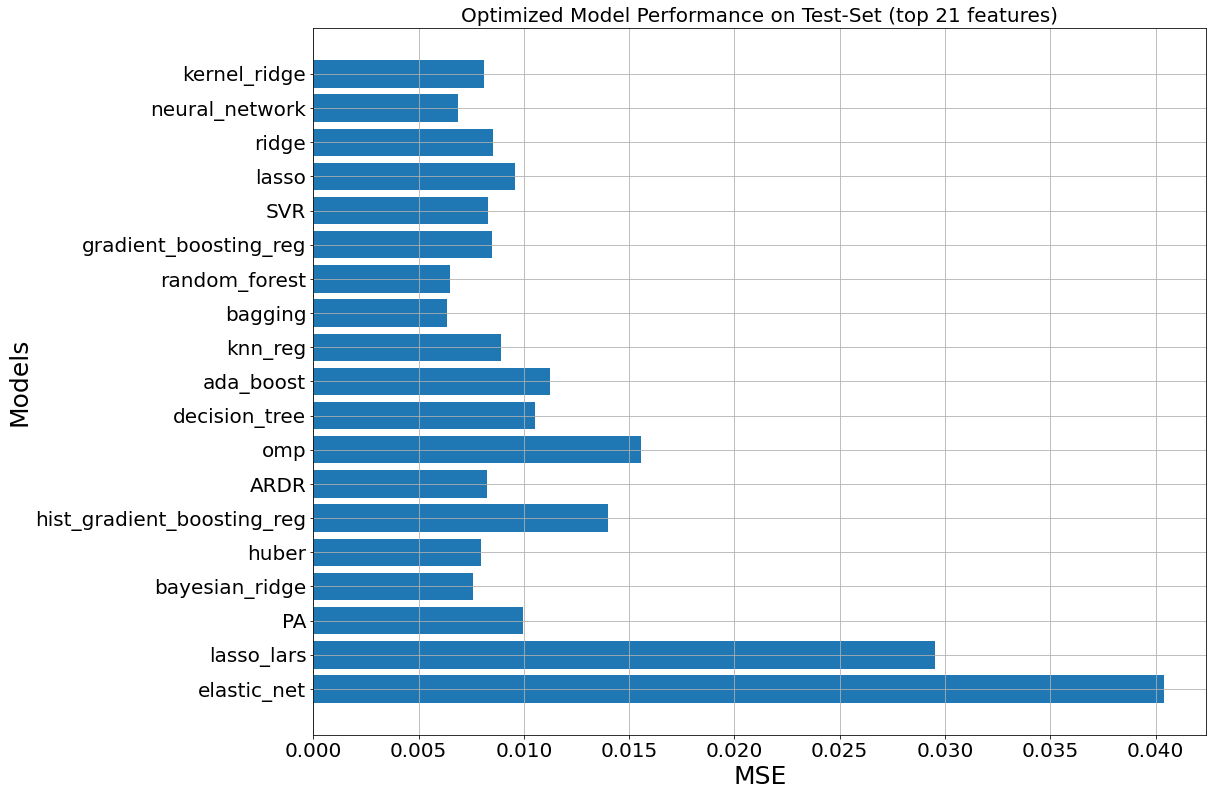

In [43]:
%time
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train_scaled,_X_test_scaled=X_train_scaled[:,rf_top_features_idx[-ntop:]],X_test_scaled[:,rf_top_features_idx[-ntop:]]
num_folds=10
cv_results_less_feat_opt={'model_name':[],'mse_cv':[],'mse_testset':[]}
_model_opt_data_df=model_opt_data_df.copy()
pbar=tqdm(_model_opt_data_df.iterrows())
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    if model_name in ['gaussian_process']:
        continue
    model=row['best_model']
    scores=cross_val_score(model,
                           _X_train_scaled,
                           y_train,
                           cv=num_folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1
                          )
    mean_score=-scores.mean()
    reg_model = model.fit(_X_train_scaled, y_train)
    y_pred=reg_model.predict(_X_test_scaled)
    mse_testset=mean_squared_error(y_test, y_pred)
    cv_results_less_feat_opt['model_name'].append(model_name)
    cv_results_less_feat_opt['mse_cv'].append(mean_score)
    cv_results_less_feat_opt['mse_testset'].append(mse_testset)

df=pd.DataFrame.from_dict(cv_results_less_feat_opt)
df=df.sort_values('mse_cv',ascending=False)
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_cv'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Optimized Cross-Validation Model Performance (top 21 features)')
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Optimized Model Performance on Test-Set (top 21 features)')

# Post Training Visualization

Text(0.5, 1.0, 'Feature Correlation Plot')

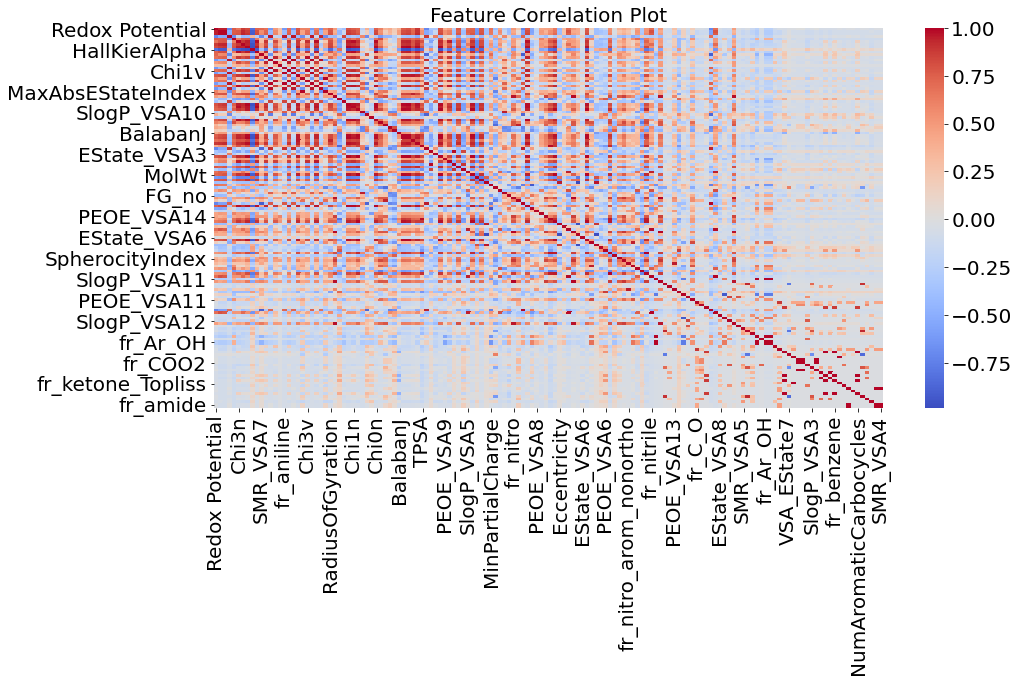

In [44]:
# plt.matshow(corr)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
import seaborn as sns
pd.options.display.max_rows = 4000

top_features=rf_top_features.copy()
top_features.append('Redox Potential')

corr = data[top_features[::-1]].corr()
sns.heatmap(corr,cmap='coolwarm')
plt.title('Feature Correlation Plot')

Text(0.5, 1.0, '% Absolute Error Vs. FG')

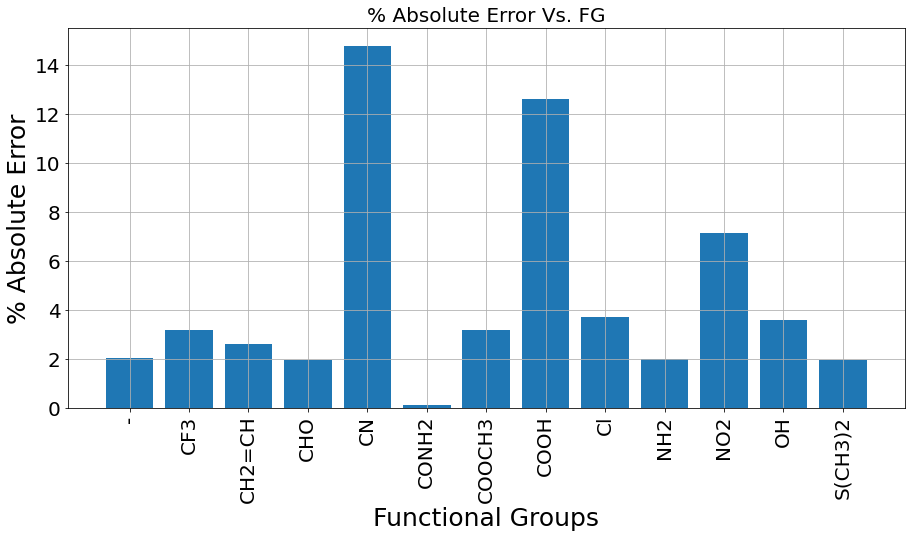

In [53]:
top_model=model_opt_data_df[model_opt_data_df['model_name']=='gaussian_process']['best_model'].values[0]
top_model.fit(X_train_scaled,y_train)
y_pred=top_model.predict(X_test_scaled)
_data_test=data_test.copy()
_data_test['pred_redox_potential']=y_pred
_data_test['%_absolute_error']=np.abs((_data_test['pred_redox_potential']-
                                      _data_test['Redox Potential'])*100/
                                      _data_test['Redox Potential']
                                     )
gb=_data_test.groupby('FG_name').mean()
plt.bar(gb.index,gb['%_absolute_error'])
plt.xticks(rotation=90)
plt.xlabel('Functional Groups')
plt.ylabel('% Absolute Error')
plt.title('% Absolute Error Vs. FG')

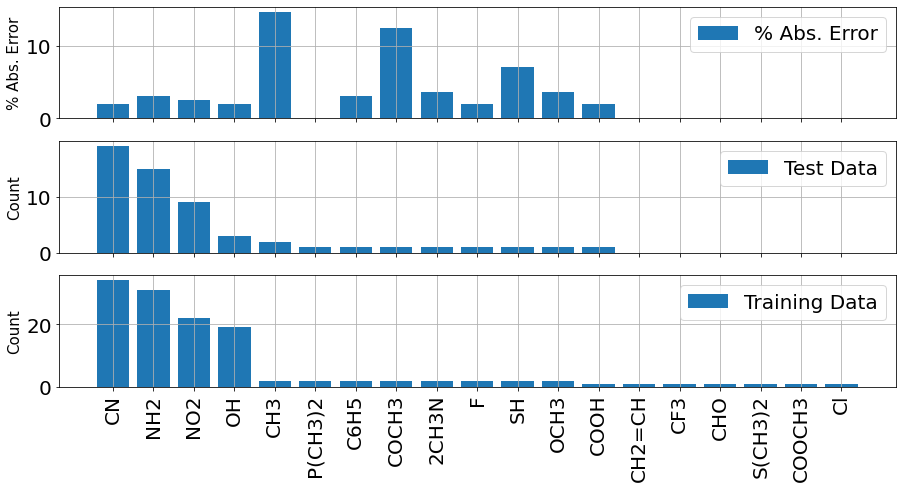

In [58]:
#seed=200
train_dist=data.iloc[X_train.index]['FG_name'].value_counts()
test_dist=data.iloc[X_test.index]['FG_name'].value_counts()
fig,(ax1,ax2,ax3)=plt.subplots(3,1,sharex=True)

ax1.bar(gb.index,gb['%_absolute_error'],label='% Abs. Error')
ax2.bar(test_dist.index,test_dist,label='Test Data')
ax3.bar(train_dist.index,train_dist,label='Training Data')

plt.xticks(rotation=90)
ax1.set_ylabel('% Abs. Error',fontsize=15)
ax2.set_ylabel('Count',fontsize=15)
ax3.set_ylabel('Count',fontsize=15)
ax1.legend()
ax2.legend()
ax3.legend()
# plt.tight_layout()

# Features


* **SlogP_VSA1 - SlogP_VSA12** - Sum of van der Waals surface area (in Å2) over all atoms such that SlogP is in a specified range [[1](http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm)]


* **SlogP** - Log of the octanol/water partition coefficient (including implicit hydrogens). This property is an atomic contribution model [[Crippen 1999](https://pubs.acs.org/doi/full/10.1021/ci990307l)] that calculates logP from the given structure; i.e., the correct protonation state (washed structures). Results may vary from the logP(o/w) descriptor. The training set for SlogP was ~7000 structures.


* **fr_NH0** - Number of Tertiary amines


* **fr_NH2** - Number of Primary amines


* **fr_ArN** - Number of N functional groups attached to aromatics


* **fr_aniline** - Number of anilines


* **VSA_EState1 - VSA_EState10** MOE-type descriptors using EState indices and surface area contributions (developed at RD, not described in the CCG paper)[[2](http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)]


* **E-statesindex** - Electrotopological State index for atoms in a molecule. Encode the topology and electronic environment of molecular fragments. This index combines both the electronic character and the topological environment of each skeletal atom in a molecule [[3](https://pubs.acs.org/doi/pdf/10.1021/ci00001a012),[4](https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment),[5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/)]


* **HallKierAlpha** - Sum of ratio of non-c(sp3) atoms covalent radii of the atom to the sp3 carbon over summed over all atoms in a molecule [[6](https://onlinelibrary.wiley.com/doi/abs/10.1002/9780470125793.ch9)]


* **Chi(1/2)n** - Atomic connectivity index (order 1/2) in the hydrogen suppressed graph .This is calculated as the sum of 1/sqrt(didj) over all bonds between heavy atoms i and j where i < j. di (number of heavy neighbors)


* **Ipc** - information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule


* **Chi3v** - Atomic valence connectivity index (order 3). This is calculated as the sum of 1/sqrt(vivj) over all bonds between heavy atoms i and j where i < j. For a heavy atom i let vi = (pi - hi) / (Zi - pi - 1) where pi is the number of s and p valence electrons of atom i.


* **BertzCT** - A topological index meant to quantify "complexity" of molecules. Consists of a sum of two terms, one representing the complexity of the bonding, the other representing the complexity of the distribution of heteroatoms (from graph theory)


* **Kappa3** - Third kappa shape index: (n-1) (n-3)2 / p32 for odd n, and (n-3) (n-2)2 / p32 for even n. n denotes the number of atoms in the hydrogen suppressed graph. Also, let p2 denote the number of paths of length 2 and p3 the number of paths of length 3


* **PEOE_VSA9** - calculated using partial using partial charges and van der waals surface area contributions of atoms


* **labuteASA** - Water accessible surface area calculated using a radius of 1.4 A for the water molecule. A polyhedral representation is used for each atom in calculating the surface area.


* **SMR_VSA(0-7)** - based on an approximate accessible van der Waals surface area (in Å2) and contribution to Molar Refractivity, summed over all atoms


* **MinAbsPartialCharge** - self-explanatory


* **MaxAbsEStateIndex** - Maximum Absolute Electrotopological State index of molecule


* **balabanJ** - Balaban's connectivity topological index

### References: 
1. http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm, https://www.juit.ac.in/attachments/biomin/help.html


2. http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors


3. https://pubs.acs.org/doi/pdf/10.1021/ci00001a012


4. https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment


5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/


6. Hall, L.H., Kier, L.B.; The Molecular Connectivity Chi Indices and Kappa Shape Indices in Structure-Property Modeling; Reviews of Computational Chemistry 2


* [Crippen 1999] - Wildman, S.A., Crippen, G.M.; Prediction of Physiochemical Parameters by Atomic Contributions; J. Chem. Inf. Comput. Sci. 39 No. 5 (1999) 868–873




* **Graph Descriptors** - https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/GraphDescriptors.py


* **MOE** - MOE (Molecular Operating Environment) 2011 software were used to calculate about 300 molecular descriptors for each of these compounds


* **SMR** - molar refractivity (MR), a common descriptor accounting for molecular size and polarizability (https://pubs.acs.org/doi/full/10.1021/ci990307l)

* https://www.researchgate.net/figure/Molecular-descriptors-used-and-their-explanation-adapted-from-MOE-tutorial-Chemical_tbl1_225274017

* **fr** - http://rdkit.org/docs/source/rdkit.Chem.Fragments.html

* **BertzCT** - https://pubs.acs.org/doi/pdf/10.1021/ja00402a071

* **balabanJ** - https://www.sciencedirect.com/science/article/pii/0009261482800092


# List of All Descriptors Used in Training

In [47]:
list(X.columns)

['FG_no',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'Sl